## Load in Data

In [1]:
import pandas as pd

game_data = pd.read_csv('datasets/cleaned_data/clean_retrosheet.csv')

In [2]:
game_data

,Unnamed: 0,Date,Number of game,Visiting Team,Home Team,Visiting Team Score,Home Team Score,Home Score SMA,Home Score CMA,Home Score EMA,...,Visiting Errors EMA,Visiting Passed Balls SMA,Visiting Passed Balls CMA,Visiting Passed Balls EMA,Visiting Double Plays SMA,Visiting Double Plays CMA,Visiting Double Plays EMA,Visiting Triple Plays SMA,Visiting Triple Plays CMA,Visiting Triple Plays EMA
0,0,20140415,0,NYN,ARI,9,0,3.8,3.800000,3.430552,...,0.140383,0.0,0.064909,0.008247,0.7,0.813387,0.891189,0.0,0.000000,0.000000e+00
1,1,20140416,0,NYN,ARI,5,2,3.7,3.454545,2.806815,...,0.114859,0.0,0.064777,0.006748,0.7,0.811741,0.729154,0.0,0.000000,0.000000e+00
2,2,20140418,0,SFN,SDN,1,2,3.1,3.100000,2.996733,...,0.437913,0.1,0.056795,0.087325,1.1,0.900609,0.715089,0.0,0.000000,0.000000e+00
3,3,20140418,0,SEA,MIA,4,8,5.8,5.800000,6.013663,...,0.660538,0.0,0.066532,0.000986,1.1,0.907258,1.048140,0.0,0.004032,1.384551e-15
4,4,20140418,0,CHA,TEX,0,12,4.1,4.100000,5.009391,...,0.722905,0.1,0.099796,0.105171,1.0,0.942974,1.034505,0.0,0.006110,2.654710e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14272,14272,20190929,0,CLE,WAS,2,8,5.4,4.870103,6.660369,...,0.231371,0.0,0.052632,0.000008,0.5,0.826625,0.557986,0.0,0.001032,1.001637e-39
14273,14273,20190929,0,LAN,SFN,9,0,2.7,3.987629,2.878532,...,0.716523,0.0,0.079218,0.024934,0.2,0.758230,0.204445,0.0,0.000000,0.000000e+00
14274,14274,20190929,0,NYA,TEX,1,6,6.8,5.063918,6.507256,...,0.904041,0.1,0.098867,0.079272,0.6,0.708548,0.539961,0.0,0.001030,3.998097e-43
14275,14275,20190929,0,ATL,NYN,6,7,4.6,3.977320,4.306852,...,0.171704,0.0,0.105155,0.062462,1.1,0.917526,1.112972,0.0,0.000000,0.000000e+00


In [3]:
# read in all game logs
gl = [pd.read_csv(f'datasets/retro_sheet_gls/GL{year}.TXT') for year in range(2014,2020,1)]

# concatenate all into one dataframe
game_logs = pd.concat(gl, ignore_index=True)
    
# sort by date
game_logs.sort_values('Date', axis=0, inplace=True)

game_logs

,Date,Number of game,Day,Visiting Team,Visiting Team League,Visiting Team Game Number,Home Team,Home Team League,Home Team Game Number,Visiting Team Score,...,Home Team Player 7 Name,Home Team Player 7 Defensive Position,Home Team Player 8 ID,Home Team Player 8 Name,Home Team Player 8 Defensive Position,Home Team Player 9 ID,Home Team Player 9 Name,Home Team Player 9 Defensive Position,Miscellaneous,Acquisition Information
0,20140322,0,Sat,LAN,NL,1,ARI,NL,1,3,...,Chris Owings,6,parrg001,Gerardo Parra,9,milew001,Wade Miley,1,NaN,Y
1,20140323,0,Sun,LAN,NL,2,ARI,NL,2,7,...,Gerardo Parra,9,gregd001,Didi Gregorius,6,cahit001,Trevor Cahill,1,NaN,Y
2,20140330,0,Sun,LAN,NL,3,SDN,NL,1,1,...,Will Venable,8,river003,Rene Rivera,2,casha001,Andrew Cashner,1,NaN,Y
14,20140331,0,Mon,WAS,NL,1,NYN,NL,1,9,...,Travis d'Arnaud,2,tejar001,Ruben Tejada,6,gee-d001,Dillon Gee,1,NaN,Y
13,20140331,0,Mon,ATL,NL,1,MIL,NL,1,0,...,Lyle Overbay,3,genns001,Scooter Gennett,4,gally001,Yovani Gallardo,1,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,20190929,0,Sun,MIL,NL,162,COL,NL,162,3,...,Pat Valaika,4,woltt001,Tony Wolters,2,hoffj003,Jeff Hoffman,1,NaN,Y
14562,20190929,0,Sun,SDN,NL,162,ARI,NL,162,0,...,Jarrod Dyson,8,josec002,Caleb Joseph,2,walkt004,Taijuan Walker,1,NaN,Y
14575,20190929,0,Sun,NYA,AL,162,TEX,AL,162,1,...,Ronald Guzman,3,deshd002,Delino DeShields,8,trevj001,Jose Trevino,2,NaN,Y
14568,20190929,0,Sun,CHN,NL,162,SLN,NL,162,0,...,Paul DeJong,6,badeh001,Harrison Bader,8,flahj002,Jack Flaherty,1,NaN,Y


## Split dataset into EMA, CMA and SMA

In [4]:
# get list of column labels for data
labels = game_data.columns

# get list of label names that we want to drop from our dataset
ema_drop_labels = ['Unnamed: 0']
cma_drop_labels = ['Unnamed: 0']
sma_drop_labels = ['Unnamed: 0']
for label in labels:
    if 'CMA' in label or 'SMA' in label:
        ema_drop_labels.append(label)
    if 'CMA' in label or 'EMA' in label:
        sma_drop_labels.append(label)
    if 'SMA' in label or 'EMA' in label:
        cma_drop_labels.append(label)

# drop unwanted data
ema = game_data.drop(columns=ema_drop_labels)
cma = game_data.drop(columns=cma_drop_labels)
sma = game_data.drop(columns=sma_drop_labels)

In [5]:
ema

,Date,Number of game,Visiting Team,Home Team,Visiting Team Score,Home Team Score,Home Score EMA,Home At-bats EMA,Home Hits EMA,Home Doubles EMA,...,Visiting Individual Earned Runs EMA,Visiting Earned Runs EMA,Visiting Wild Pitches EMA,Visiting Balks EMA,Visiting Putouts EMA,Visiting Assists EMA,Visiting Errors EMA,Visiting Passed Balls EMA,Visiting Double Plays EMA,Visiting Triple Plays EMA
0,20140415,0,NYN,ARI,9,0,3.430552,34.452952,8.739615,2.081907,...,5.241957,5.241957,1.092870,1.095304e-02,28.586415,11.428553,0.140383,0.008247,0.891189,0.000000e+00
1,20140416,0,NYN,ARI,5,2,2.806815,33.643324,7.696049,1.703379,...,4.288874,4.288874,0.894167,8.961582e-03,28.297976,10.441544,0.114859,0.006748,0.729154,0.000000e+00
2,20140418,0,SFN,SDN,1,2,2.996733,30.418201,7.124677,1.456278,...,4.033911,4.033911,0.254866,1.979676e-04,26.601751,10.310060,0.437913,0.087325,0.715089,0.000000e+00
3,20140418,0,SEA,MIA,4,8,6.013663,33.913746,10.206027,2.265434,...,3.688050,3.688050,0.718885,9.778154e-06,26.042230,9.643132,0.660538,0.000986,1.048140,1.384551e-15
4,20140418,0,CHA,TEX,0,12,5.009391,33.811406,9.621014,2.257176,...,5.208565,5.208565,0.207281,7.332272e-03,25.646669,11.130677,0.722905,0.105171,1.034505,2.654710e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14272,20190929,0,CLE,WAS,2,8,6.660369,31.861913,9.253509,2.323107,...,5.634948,5.634948,0.476963,2.394571e-06,25.203522,6.621730,0.231371,0.000008,0.557986,1.001637e-39
14273,20190929,0,LAN,SFN,9,0,2.878532,34.772405,8.114140,1.346543,...,2.129036,2.129036,0.248833,1.394149e-02,26.711876,7.344347,0.716523,0.024934,0.204445,0.000000e+00
14274,20190929,0,NYA,TEX,1,6,6.507256,34.358827,9.114130,2.267004,...,5.140085,5.140085,0.295113,6.187488e-02,26.619901,6.817471,0.904041,0.079272,0.539961,3.998097e-43
14275,20190929,0,ATL,NYN,6,7,4.306852,31.444589,7.194629,1.657757,...,3.975713,3.975568,0.687131,1.570432e-10,25.265621,8.864056,0.171704,0.062462,1.112972,0.000000e+00


In [6]:
cma

,Date,Number of game,Visiting Team,Home Team,Visiting Team Score,Home Team Score,Home Score CMA,Home At-bats CMA,Home Hits CMA,Home Doubles CMA,...,Visiting Individual Earned Runs CMA,Visiting Earned Runs CMA,Visiting Wild Pitches CMA,Visiting Balks CMA,Visiting Putouts CMA,Visiting Assists CMA,Visiting Errors CMA,Visiting Passed Balls CMA,Visiting Double Plays CMA,Visiting Triple Plays CMA
0,20140415,0,NYN,ARI,9,0,3.800000,34.600000,8.900000,2.000000,...,3.722110,3.713996,0.288032,0.024341,27.647059,9.352941,0.525355,0.064909,0.813387,0.000000
1,20140416,0,NYN,ARI,5,2,3.454545,34.181818,8.363636,1.818182,...,3.714575,3.706478,0.287449,0.024291,27.645749,9.346154,0.524291,0.064777,0.811741,0.000000
2,20140418,0,SFN,SDN,1,2,3.100000,31.400000,7.500000,1.600000,...,3.665314,3.647059,0.300203,0.030426,27.724138,10.391481,0.523327,0.056795,0.900609,0.000000
3,20140418,0,SEA,MIA,4,8,5.800000,33.500000,9.800000,2.300000,...,3.868952,3.868952,0.395161,0.042339,27.518145,9.401210,0.598790,0.066532,0.907258,0.004032
4,20140418,0,CHA,TEX,0,12,4.100000,33.700000,9.100000,2.000000,...,4.352342,4.346232,0.474542,0.032587,27.364562,9.619145,0.665988,0.099796,0.942974,0.006110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14272,20190929,0,CLE,WAS,2,8,4.870103,33.451546,8.942268,1.824742,...,3.638803,3.627451,0.306502,0.019608,26.853457,9.133127,0.538700,0.052632,0.826625,0.001032
14273,20190929,0,LAN,SFN,9,0,3.987629,33.449485,8.474227,1.680412,...,3.448560,3.439300,0.301440,0.047325,26.915638,9.364198,0.572016,0.079218,0.758230,0.000000
14274,20190929,0,NYA,TEX,1,6,5.063918,33.451546,8.847423,1.692784,...,3.934089,3.927909,0.401648,0.025747,26.814624,9.016478,0.576725,0.098867,0.708548,0.001030
14275,20190929,0,ATL,NYN,6,7,3.977320,32.727835,7.630928,1.534021,...,4.127835,4.124742,0.412371,0.030928,26.802062,9.501031,0.547423,0.105155,0.917526,0.000000


In [7]:
sma

,Date,Number of game,Visiting Team,Home Team,Visiting Team Score,Home Team Score,Home Score SMA,Home At-bats SMA,Home Hits SMA,Home Doubles SMA,...,Visiting Individual Earned Runs SMA,Visiting Earned Runs SMA,Visiting Wild Pitches SMA,Visiting Balks SMA,Visiting Putouts SMA,Visiting Assists SMA,Visiting Errors SMA,Visiting Passed Balls SMA,Visiting Double Plays SMA,Visiting Triple Plays SMA
0,20140415,0,NYN,ARI,9,0,3.8,34.6,8.9,2.0,...,4.4,4.4,1.1,0.0,28.6,10.8,0.2,0.0,0.7,0.0
1,20140416,0,NYN,ARI,5,2,3.7,34.3,8.7,1.9,...,4.2,4.2,1.0,0.0,28.6,10.3,0.2,0.0,0.7,0.0
2,20140418,0,SFN,SDN,1,2,3.1,31.4,7.5,1.6,...,4.5,4.5,0.2,0.0,26.4,10.8,0.4,0.1,1.1,0.0
3,20140418,0,SEA,MIA,4,8,5.8,33.5,9.8,2.3,...,3.1,3.1,0.7,0.0,26.6,9.8,0.6,0.0,1.1,0.0
4,20140418,0,CHA,TEX,0,12,4.1,33.7,9.1,2.0,...,4.0,4.0,0.3,0.0,25.8,11.2,0.7,0.1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14272,20190929,0,CLE,WAS,2,8,5.4,30.6,8.2,2.0,...,4.4,4.4,0.5,0.0,25.5,6.3,0.2,0.0,0.5,0.0
14273,20190929,0,LAN,SFN,9,0,2.7,34.7,7.7,1.2,...,2.4,2.4,0.4,0.0,26.4,8.0,0.7,0.0,0.2,0.0
14274,20190929,0,NYA,TEX,1,6,6.8,34.6,9.4,2.1,...,5.1,5.1,0.4,0.1,27.1,7.0,0.9,0.1,0.6,0.0
14275,20190929,0,ATL,NYN,6,7,4.6,32.0,7.0,1.3,...,4.2,4.2,0.6,0.0,25.2,8.8,0.1,0.0,1.1,0.0


In [8]:
# Let's get the labels we need for predictions
pred_labels = ['Date', 'Number of game', 'Visiting Team', 'Home Team', 'Visiting Team Score', 'Home Team Score']

preds = game_data[pred_labels]

preds

,Date,Number of game,Visiting Team,Home Team,Visiting Team Score,Home Team Score
0,20140415,0,NYN,ARI,9,0
1,20140416,0,NYN,ARI,5,2
2,20140418,0,SFN,SDN,1,2
3,20140418,0,SEA,MIA,4,8
4,20140418,0,CHA,TEX,0,12
...,...,...,...,...,...,...
14272,20190929,0,CLE,WAS,2,8
14273,20190929,0,LAN,SFN,9,0
14274,20190929,0,NYA,TEX,1,6
14275,20190929,0,ATL,NYN,6,7


In [9]:
# drop winners_labels from our ema, cma and sma data to have only numerical data
ema_num = ema.drop(columns=pred_labels)
cma_num = cma.drop(columns=pred_labels)
sma_num = sma.drop(columns=pred_labels)

ema_num['Home ER/Score EMA'] = ema_num['Home Earned Runs EMA']/ema_num['Home Score EMA']
ema_num['Visiting ER/Score EMA'] = ema_num['Visiting Earned Runs EMA']/ema_num['Visiting Score EMA']

In [10]:
# find cutoff index to separate training from testing data
cutoff = 0
for index, date in preds["Date"].items():
    if str(date)[0:4] == '2019':
        cutoff = index
        break
        
print(cutoff)
preds.loc[cutoff-1,:]

11848


Date                   20181001
Number of game                0
Visiting Team               COL
Home Team                   LAN
Visiting Team Score           2
Home Team Score               5
Name: 11847, dtype: object

In [11]:
# make new series for winner binary option
pred_bin = []

for i in range(preds.shape[0]):
    if preds.loc[i,'Visiting Team Score'] > preds.loc[i,'Home Team Score']:
        pred_bin.append('Away')
    else:
        pred_bin.append('Home')

In [12]:
# time to scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#ema_scaled = scaler.fit_transform(ema_num)
#cma_scaled = scaler.fit_transform(cma_num)
#sma_scaled = scaler.fit_transform(sma_num)

#ema_train, ema_test = ema_num.loc[:cutoff-1, :], ema_num.loc[cutoff:, :]
#cma_train, cma_test = cma_scaled[:cutoff],cma_scaled[cutoff:]
#sma_train, sma_test = sma_scaled[:cutoff],sma_scaled[cutoff:]

ema_train, ema_test = ema_num.loc[:cutoff-1, :], ema_num.loc[cutoff:, :]
cma_train, cma_test = cma_num.loc[:cutoff-1, :], cma_num.loc[cutoff:, :]
sma_train, sma_test = sma_num.loc[:cutoff-1, :], sma_num.loc[cutoff:, :]

# transform test sets on training set scale
ema_train_scaled = scaler.fit_transform(ema_train)
ema_test_scaled = scaler.transform(ema_test)

cma_train_scaled = scaler.fit_transform(cma_train)
cma_test_scaled = scaler.transform(cma_test)

sma_train_scaled = scaler.fit_transform(sma_train)
sma_test_scaled = scaler.transform(sma_test)

winners_train, winners_test = pred_bin[:cutoff], pred_bin[cutoff:]

In [13]:
ema_num.columns.to_list()

['Home Score EMA',
 'Home At-bats EMA',
 'Home Hits EMA',
 'Home Doubles EMA',
 'Home Triples EMA',
 'Home Homeruns EMA',
 'Home RBIs EMA',
 'Home Sacrifice Hits EMA',
 'Home Sacrifice Flies EMA',
 'Home Hit-by-pitch EMA',
 'Home Walks EMA',
 'Home Intentional Walks EMA',
 'Home Strikeouts EMA',
 'Home Stolen Bases EMA',
 'Home Caught Stealing EMA',
 'Home Grounded into DP EMA',
 'Home Left on Base EMA',
 'Home Pitchers Used EMA',
 'Home Individual Earned Runs EMA',
 'Home Earned Runs EMA',
 'Home Wild Pitches EMA',
 'Home Balks EMA',
 'Home Putouts EMA',
 'Home Assists EMA',
 'Home Errors EMA',
 'Home Passed Balls EMA',
 'Home Double Plays EMA',
 'Home Triple Plays EMA',
 'Visiting Score EMA',
 'Visiting At-bats EMA',
 'Visiting Hits EMA',
 'Visiting Doubles EMA',
 'Visiting Triples EMA',
 'Visiting Homeruns EMA',
 'Visiting RBIs EMA',
 'Visiting Sacrifice Hits EMA',
 'Visiting Sacrifice Flies EMA',
 'Visiting Hit-by-pitch EMA',
 'Visiting Walks EMA',
 'Visiting Intentional Walks EMA'

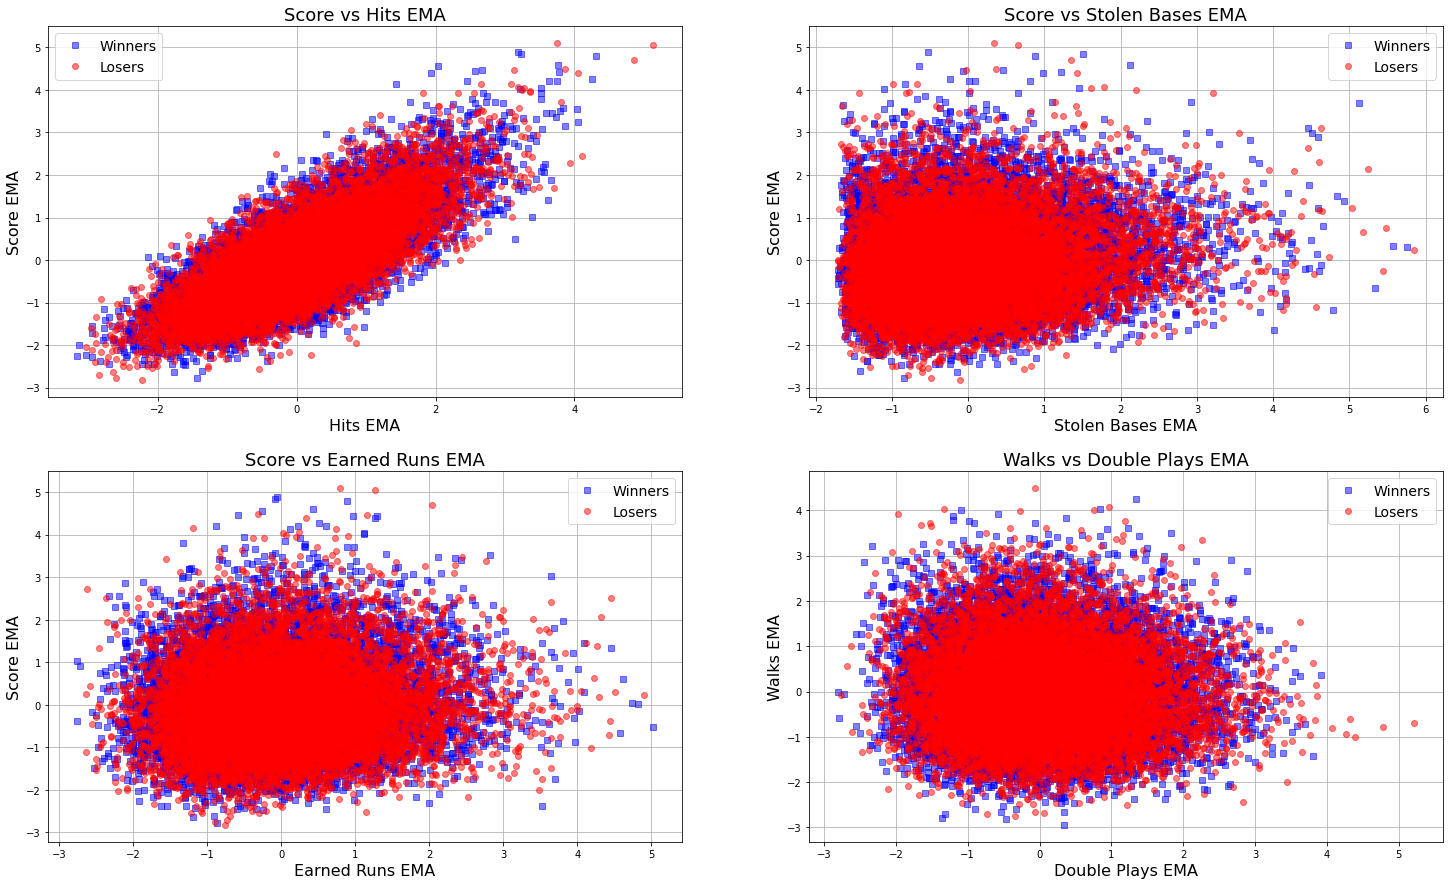

In [269]:
import matplotlib.pyplot as plt

def make_winners_losers(x_label, y_label):
    # Let's plot hits vs rbis of the winners and losers
    winners_x, winners_y, losers_x, losers_y =[],[],[],[]
    # get column indexes
    col_names = ema_num.columns.to_list()
    x_axis = x_label
    y_axis = y_label
    h_x = col_names.index(f'Home {x_axis} EMA')
    v_x = col_names.index(f'Visiting {x_axis} EMA')
    h_y = col_names.index(f'Home {y_axis} EMA')
    v_y = col_names.index(f'Visiting {y_axis} EMA')
    for i in range(len(ema_train_scaled)):
        if pred_bin[i] == 'Home':
            winners_x.append(ema_train_scaled[i, h_x])
            winners_y.append(ema_train_scaled[i, h_y])
            losers_x.append(ema_train_scaled[i, v_x])
            losers_y.append(ema_train_scaled[i, v_y])
        else:
            losers_x.append(ema_train_scaled[i, h_x])
            losers_y.append(ema_train_scaled[i, h_y])
            winners_x.append(ema_train_scaled[i, v_x])
            winners_y.append(ema_train_scaled[i, v_y])
            
    return winners_x, winners_y, losers_x, losers_y

def make_plots(ax, x_label, y_label):
    winners_x, winners_y, losers_x, losers_y = make_winners_losers(x_label, y_label)
    ax.plot(winners_x, winners_y, 'bs', label='Winners', alpha=0.5)
    ax.plot(losers_x, losers_y, 'ro', label='Losers', alpha=0.5)
    ax.legend(fontsize=14)
    ax.set_xlabel(f'{x_label} EMA', fontsize=16)
    ax.set_ylabel(f'{y_label} EMA', fontsize=16)
    ax.set_title(f'{y_label} vs {x_label} EMA', fontsize=18)
    ax.grid()
    
fig, axs = plt.subplots(2, 2,)
fig.set_size_inches(25,15)
make_plots(axs[0, 0], 'Hits', 'Score')
make_plots(axs[0, 1], 'Stolen Bases', 'Score')
make_plots(axs[1, 0], 'Earned Runs', 'Score')
make_plots(axs[1, 1], 'Double Plays', 'Walks')

path = '/mnt/c/Users/Michael/Documents/UCONN/courses/Senior Design/figures/'
plt.savefig(path + f'linear_combos.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.25)

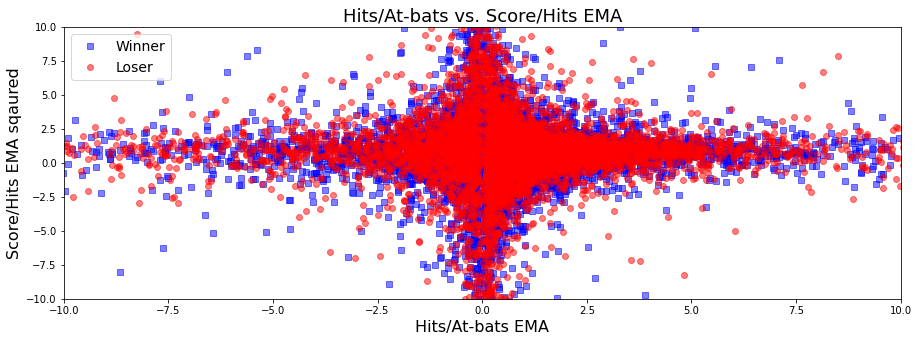

In [301]:
winners_x, winners_y, losers_x, losers_y = [],[],[],[]
# get column indexes
col_names = ema_num.columns.to_list()
x_axis_1 = 'Hits'
x_axis_2 = 'At-bats'
y_axis_1 = 'Score'
y_axis_2 = 'Hits'
h_x_1 = col_names.index(f'Home {x_axis_1} EMA')
h_x_2 = col_names.index(f'Home {x_axis_2} EMA')
v_x_1 = col_names.index(f'Visiting {x_axis_1} EMA')
v_x_2 = col_names.index(f'Visiting {x_axis_2} EMA')
h_y_1 = col_names.index(f'Home {y_axis_1} EMA')
h_y_2 = col_names.index(f'Home {y_axis_2} EMA')
v_y_1 = col_names.index(f'Visiting {y_axis_1} EMA')
v_y_2 = col_names.index(f'Visiting {y_axis_2} EMA')
data = ema_train_scaled
for i in range(len(ema_train)):
    if pred_bin[i] == 'Home':
        winners_x.append(data[i, h_x_1]/data[i, h_x_2])
        winners_y.append(data[i, h_y_1]/data[i, h_y_2])
        losers_x.append(data[i, v_x_1]/data[i, v_x_2])
        losers_y.append(data[i, v_y_1]/data[i, v_y_2])
    else:
        losers_x.append(data[i, h_x_1]/data[i, h_x_2])
        losers_y.append(data[i, h_y_1]/data[i, h_y_2])
        winners_x.append(data[i, v_x_1]/data[i, v_x_2])
        winners_y.append(data[i, v_y_1]/data[i, v_y_2])

# plot for the winning/losing team
fig3, ax = plt.subplots(1,1)
fig3.set_size_inches(15,5)
n=len(winners_x)
ax.plot(winners_x[0:n], winners_y[0:n], 'bs', label='Winner', alpha=0.5)
ax.plot(losers_x[0:n], losers_y[0:n], 'ro', label='Loser', alpha=0.5)
ax.legend(fontsize=14)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xlabel(f'{x_axis_1}/{x_axis_2} EMA', fontsize=16)
ax.set_ylabel(f'{y_axis_1}/{y_axis_2} EMA sqaured', fontsize=16)
ax.set_title(f'{x_axis_1}/{x_axis_2} vs. {y_axis_1}/{y_axis_2} EMA', fontsize=18)

path = '/mnt/c/Users/Michael/Documents/UCONN/courses/Senior Design/figures/'
plt.savefig(path + f'{x_axis_1}_{x_axis_2}_vs_{y_axis_1}_{y_axis_2}.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [394]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_linear = {'dual': [False],
                'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
                'loss': ['squared_hinge'],
                'penalty': ['l2']
                }

data = ema_train_scaled
targets = pred_bin[0:cutoff]

grid_linear = GridSearchCV(LinearSVC(), param_linear, cv=5)
grid_linear.fit(data, targets)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                               1],
                         'dual': [False], 'loss': ['squared_hinge'],
                         'penalty': ['l2']})

In [405]:
best_linear_est = grid_linear.cv_results_[f'split{grid_linear.best_index_}_test_score']

print(np.average(best_linear_est))
print(np.max(best_linear_est))
print(np.min(best_linear_est))

0.5351414098775855
0.5411566061629379
0.5272266779231743


In [399]:
grid_linear.best_estimator_

LinearSVC(C=0.0001, dual=False)

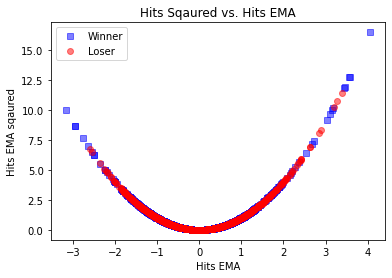

In [170]:
# In the previous example, it seems that the previous games stats for a team
# have no bearing on how that team will perform during the current game.
# Are there stats that are less prone to drastic change that are a good
# predictor of who will win and who will lose? ERA may give us insight
# Let's plot hits vs rbis of the winners and losers
winners_x = []
winners_y = []
losers_x = []
losers_y = []
# get column indexes
col_names = ema_num.columns.to_list()
x_axis = 'Hits'
y_axis = 'RBIs'
h_x = col_names.index(f'Home {x_axis} EMA')
v_x = col_names.index(f'Visiting {x_axis} EMA')
h_y = col_names.index(f'Home {y_axis} EMA')
v_y = col_names.index(f'Visiting {y_axis} EMA')
data = ema_train_scaled
for i in range(len(ema_train)):
    if pred_bin[i] == 'Home':
        winners_x.append(data[i, h_x])
        winners_y.append(data[i, h_x]**2)
        losers_x.append(data[i, v_x])
        losers_y.append(data[i, v_x]**2)
    else:
        losers_x.append(data[i, h_x])
        losers_y.append(data[i, h_x]**2)
        winners_x.append(data[i, v_x])
        winners_y.append(data[i, v_x]**2)

# plot  for the winning/losing team
n=1000
plt.plot(winners_x[0:n], winners_y[0:n], 'bs', label='Winner', alpha=0.5)
plt.plot(losers_x[0:n], losers_y[0:n], 'ro', label='Loser', alpha=0.5)
plt.legend()
plt.xlabel(f'{x_axis} EMA')
plt.ylabel(f'{x_axis} EMA sqaured')
plt.title(f'{x_axis} Sqaured vs. {x_axis} EMA')

path = '/mnt/c/Users/Michael/Documents/UCONN/courses/Senior Design/figures/'
plt.savefig(path + f'{x_axis}_squared_vs_{x_axis}.png', format='png', dpi=300)

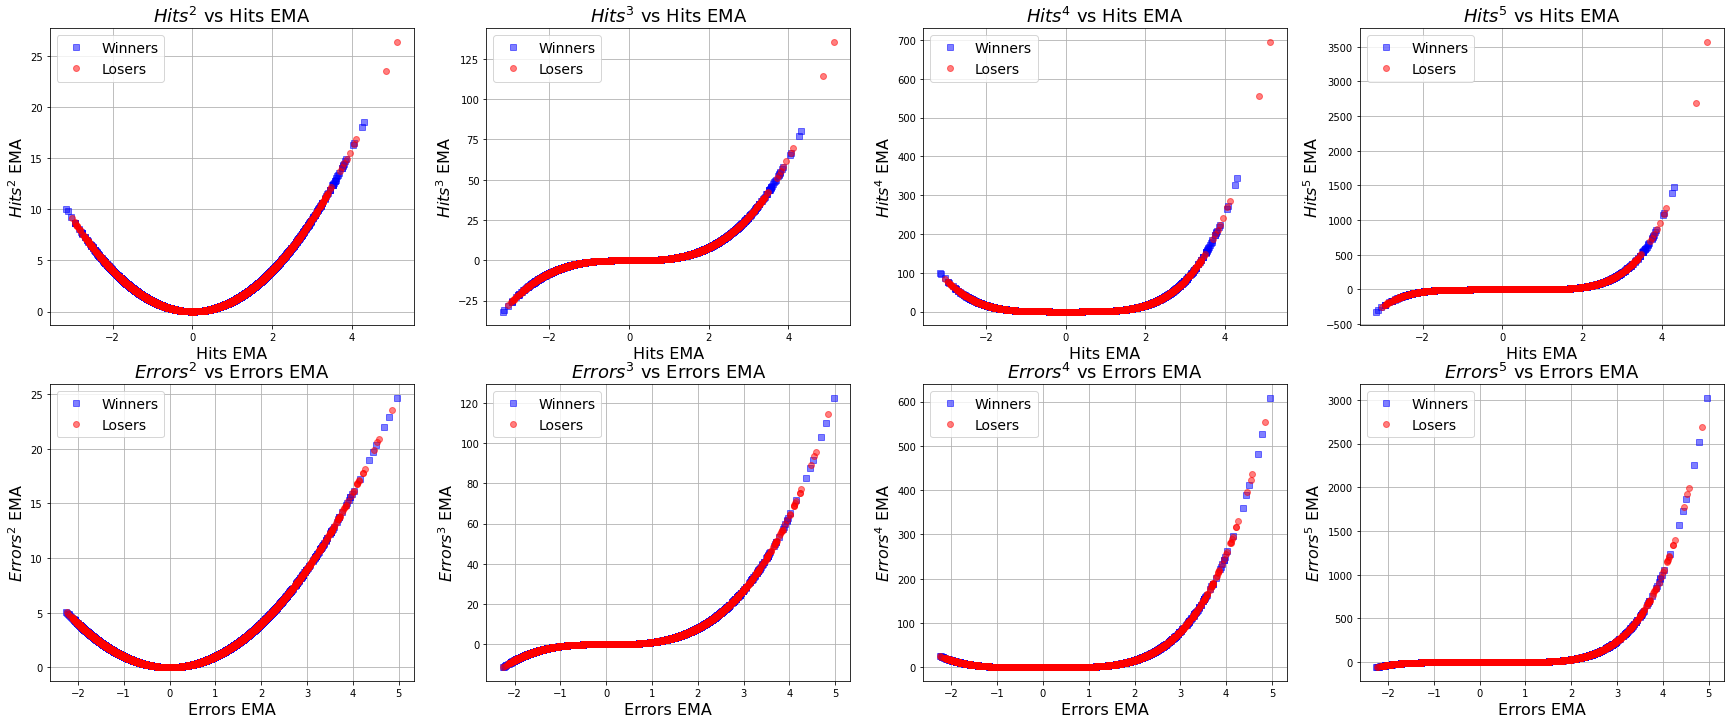

In [325]:
def make_winners_losers_poly(x_label, degree):
    # Let's plot hits vs rbis of the winners and losers
    winners_x, winners_y, losers_x, losers_y =[],[],[],[]
    # get column indexes
    col_names = ema_num.columns.to_list()
    x_axis = x_label
    h_x = col_names.index(f'Home {x_axis} EMA')
    v_x = col_names.index(f'Visiting {x_axis} EMA')
    for i in range(len(ema_train_scaled)):
        if pred_bin[i] == 'Home':
            winners_x.append(ema_train_scaled[i, h_x])
            winners_y.append(ema_train_scaled[i, h_x]**degree)
            losers_x.append(ema_train_scaled[i, v_x])
            losers_y.append(ema_train_scaled[i, v_x]**degree)
        else:
            losers_x.append(ema_train_scaled[i, h_x])
            losers_y.append(ema_train_scaled[i, h_x]**degree)
            winners_x.append(ema_train_scaled[i, v_x])
            winners_y.append(ema_train_scaled[i, v_x]**degree)
            
    return winners_x, winners_y, losers_x, losers_y

def make_plots_poly(ax, x_label, degree):
    winners_x, winners_y, losers_x, losers_y = make_winners_losers_poly(x_label, degree)
    ax.plot(winners_x, winners_y, 'bs', label='Winners', alpha=0.5)
    ax.plot(losers_x, losers_y, 'ro', label='Losers', alpha=0.5)
    ax.legend(fontsize=14)
    ax.set_xlabel(f'{x_label} EMA', fontsize=16)
    ax.set_ylabel(f'${x_label}^{degree}$ EMA', fontsize=16)
    ax.set_title(f'${x_label}^{degree}$ vs {x_label} EMA', fontsize=18)
    ax.grid()
    
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(30,12)
i = 0
for label in ['Hits', 'Errors']:
    make_plots_poly(axs[i, 0], label, 2)
    make_plots_poly(axs[i, 1], label, 3)
    make_plots_poly(axs[i, 2], label, 4)
    make_plots_poly(axs[i, 3], label, 5)
    i += 1

path = '/mnt/c/Users/Michael/Documents/UCONN/courses/Senior Design/figures/'
plt.savefig(path + f'poly_combos.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [416]:
# from above, nothing really performs well so we'll do a grid search specific for each kernel
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_poly = {'kernel': ['poly'],
              'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
              'degree': [2,3,4,5],
              'gamma': ['auto', 'scale', 1,2,3,4,5],
              }

data = ema_train_scaled[0:1000]
targets = pred_bin[0:cutoff][0:1000]

grid_poly = GridSearchCV(SVC(), param_poly, cv=5)
grid_poly.fit(data, targets)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                               1],
                         'degree': [2, 3, 4, 5],
                         'gamma': ['auto', 'scale', 1, 2, 3, 4, 5],
                         'kernel': ['poly']})

In [417]:
grid_poly.best_params_

{'C': 1e-05, 'degree': 3, 'gamma': 3, 'kernel': 'poly'}

In [415]:
data = ema_train_scaled
targets = pred_bin[0:cutoff]

cross_val_score(SVC(kernel='poly', C=1e-5, degree=3, gamma=3), data, targets, cv=5)

array([0.47341772, 0.49578059, 0.48101266, 0.48163782, 0.48374842])

In [419]:
np.max([0.47341772, 0.49578059, 0.48101266, 0.48163782, 0.48374842])

0.49578059

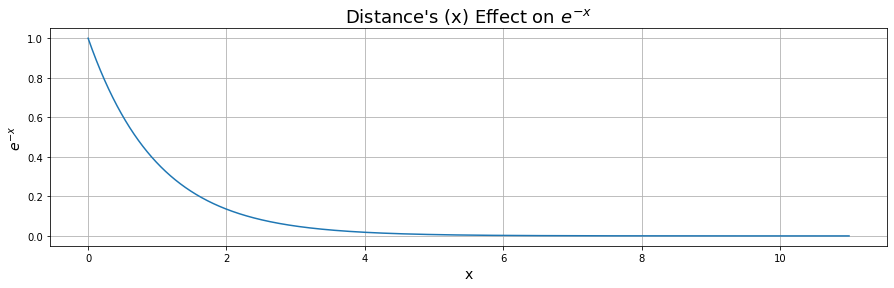

In [245]:
from math import exp
import numpy as np

x = np.arange(0,11,0.001)
y = [exp(-val) for val in x]

fig2, ax = plt.subplots(1,1)
fig2.set_size_inches(15,4)
ax.plot(x,y)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('$e^{-x}$', fontsize=14)
ax.set_title('Distance\'s (x) Effect on $e^{-x}$', fontsize=18)
ax.grid()
path = '/mnt/c/Users/Michael/Documents/UCONN/courses/Senior Design/figures/'
plt.savefig(path + 'e_vs_-x.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.25)

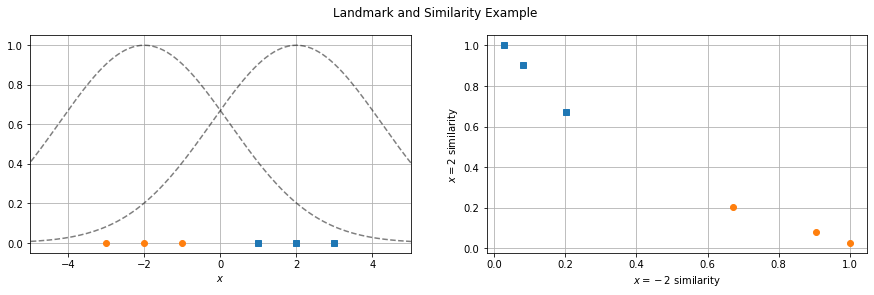

In [329]:
from math import dist

x_1 = np.arange(1,4)
y_1 = np.zeros(len(x_1))
x_2 = np.arange(-3,0)
y_2 = np.zeros(len(x_2))

gamma=0.1
x_new = np.arange(-10,11,0.1)
trans_1 = [exp(-gamma*(val-x_1[1])**2) for val in x_new]
trans_2 = [exp(-gamma*(val-x_2[1])**2) for val in x_new]

x_1_new = [exp(-gamma*(val+3)**2) for val in x_1]
y_1_new = [exp(-gamma*(val-3)**2) for val in x_1]

x_2_new = [exp(-gamma*(val+3)**2) for val in x_2]
y_2_new = [exp(-gamma*(val-3)**2) for val in x_2]

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 4)
fig.suptitle('Landmark and Similarity Example')
ax2.plot(x_1_new, y_1_new, 's')
ax2.plot(x_2_new, y_2_new, 'o')
ax2.set_xlabel('$x=-2$ similarity')
ax2.set_ylabel('$x=2$ similarity')
ax2.grid()

ax1.plot(x_new, trans_1, '--k', alpha=0.5)
ax1.plot(x_new, trans_2, '--k', alpha=0.5)
ax1.plot(x_1, y_1, 's')
ax1.plot(x_2, y_2, 'o')
ax1.set_xlim(-5,5)
ax1.grid()
ax1.set_xlabel('$x$')

path = '/mnt/c/Users/Michael/Documents/UCONN/courses/Senior Design/figures/'
plt.savefig(path + 'ex_landmark_similarity.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.25)

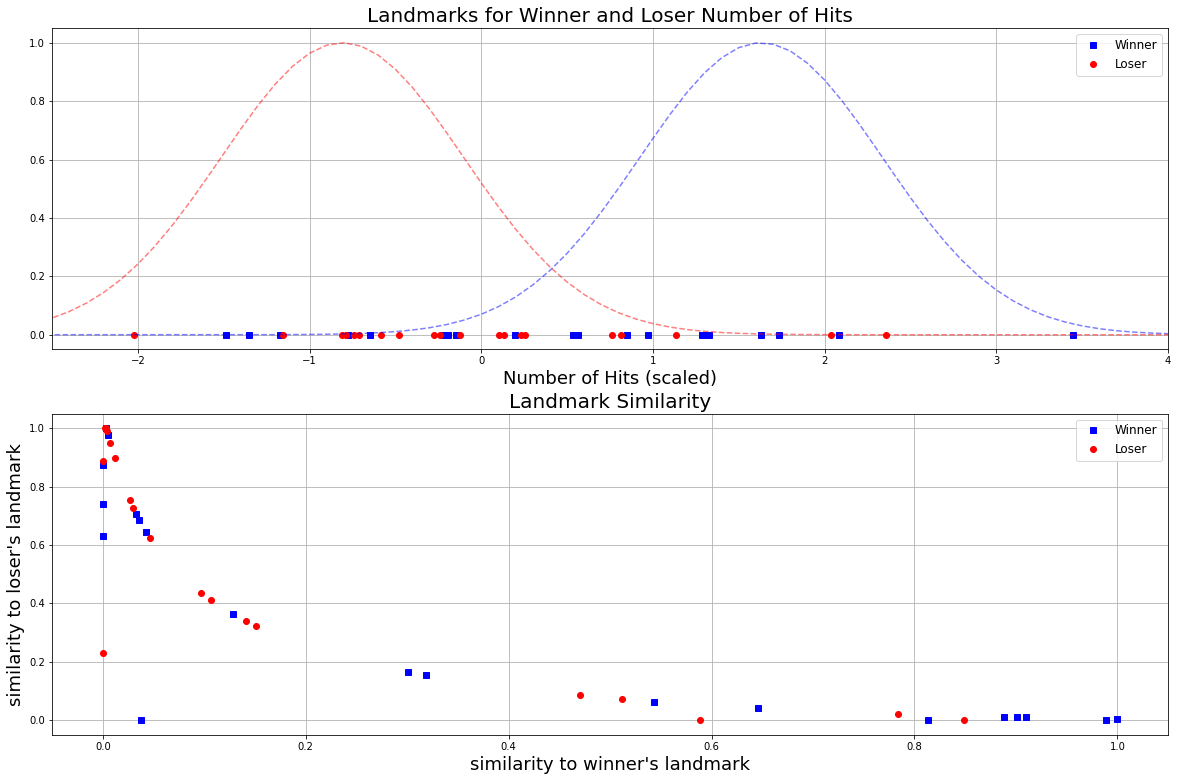

In [233]:
import math

winners_x, winners_y, losers_x, losers_y = [],[],[],[]
col_names = ema_num.columns.to_list()
x_axis = 'Hits'
y_axis = 'RBIs'
h_x = col_names.index(f'Home {x_axis} EMA')
v_x = col_names.index(f'Visiting {x_axis} EMA')
h_y = col_names.index(f'Home {y_axis} EMA')
v_y = col_names.index(f'Visiting {y_axis} EMA')
data = ema_train_scaled
for i in np.arange(20):
    if pred_bin[i] == 'Home':
        winners_x.append(data[i, h_x])
        #winners_y.append(data[i, h_x]*data[i, h_y])
        losers_x.append(data[i, v_x])
        #losers_y.append(data[i, v_x]*data[i, v_y])
    else:
        losers_x.append(data[i, h_x])
        #losers_y.append(data[i, h_x]*data[i, h_y])
        winners_x.append(data[i, v_x])
        #winners_y.append(data[i, v_x]*data[i, v_y])
        
winners_y = np.zeros(len(winners_x))
losers_y = np.zeros(len(losers_x))

gamma=1
trans_x = np.arange(-10,11,0.1)
winners_landmark = winners_x[math.floor(len(winners_x)/2)]
losers_landmark = losers_x[math.floor(len(losers_x)/2)]
trans_winners = [exp(-gamma*(val-winners_landmark)**2) for val in trans_x]
trans_losers = [exp(-gamma*(val-losers_landmark)**2) for val in trans_x]

fig1, (ax1, ax2) = plt.subplots(2, 1,)
fig1.set_size_inches(20,13)
ax1.plot(winners_x, winners_y, 'bs', label='Winner')
ax1.plot(losers_x, losers_y, 'ro', label='Loser')
ax1.plot(trans_x, trans_winners, '--b', alpha=0.5)
ax1.plot(trans_x, trans_losers, '--r', alpha=0.5)
ax1.set_xlabel('Number of Hits (scaled)', fontsize=18)
ax1.set_title('Landmarks for Winner and Loser Number of Hits', fontsize=20)
ax1.set_xlim(-2.5,4)
ax1.grid()
ax1.legend(fontsize=12)

winners_x_new = [exp(-gamma*(val-winners_landmark)**2) for val in winners_x]
winners_y_new = [exp(-gamma*(val-losers_landmark)**2) for val in winners_x]

losers_x_new = [exp(-gamma*(val-winners_landmark)**2) for val in losers_x]
losers_y_new = [exp(-gamma*(val-losers_landmark)**2) for val in losers_x]

ax2.plot(winners_x_new, winners_y_new, 'bs', label='Winner')
ax2.plot(losers_x_new, losers_y_new, 'ro', label='Loser')
ax2.set_xlabel('similarity to winner\'s landmark', fontsize=18)
ax2.set_ylabel('similarity to loser\'s landmark',fontsize=18)
ax2.set_title('Landmark Similarity', fontsize=20)
ax2.grid()
ax2.legend(fontsize=12)

path = '/mnt/c/Users/Michael/Documents/UCONN/courses/Senior Design/figures/'
plt.savefig(path + 'landmarks_similaritys.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0)

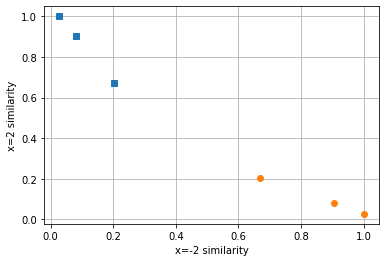

In [90]:
x_1_new = [exp(-gamma*(val+3)**2) for val in x_1]
y_1_new = [exp(-gamma*(val-3)**2) for val in x_1]

x_2_new = [exp(-gamma*(val+3)**2) for val in x_2]
y_2_new = [exp(-gamma*(val-3)**2) for val in x_2]

plt.plot(x_1_new, y_1_new, 's')
plt.plot(x_2_new, y_2_new, 'o')
plt.xlabel('x=-2 similarity')
plt.ylabel('x=2 similarity')
plt.grid()
path = '/mnt/c/Users/Michael/Documents/UCONN/courses/Senior Design/figures/'
plt.savefig(path + 'landmark_similarity.png', format='png', dpi=300)

In [420]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_rbf = {'kernel': ['rbf'],
              'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
              'gamma': ['auto', 'scale', 1,2,3,4,5],
              }

data = ema_train_scaled[0:1000]
targets = pred_bin[0:cutoff][0:1000]

grid_rbf = GridSearchCV(SVC(), param_rbf, cv=5)
grid_rbf.fit(data, targets)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                               1],
                         'gamma': ['auto', 'scale', 1, 2, 3, 4, 5],
                         'kernel': ['rbf']})

In [422]:
grid_rbf.best_params_

{'C': 1e-07, 'gamma': 'auto', 'kernel': 'rbf'}

In [423]:
grid_rbf.best_score_

0.511

In [424]:
data = ema_train_scaled
targets = pred_bin[0:cutoff]

cross_val_score(SVC(kernel='rbf', C=1e-7, gamma='auto'), data, targets, cv=5)

array([0.53417722, 0.53417722, 0.53459916, 0.5344027 , 0.5344027 ])

In [425]:
np.average([0.53417722, 0.53417722, 0.53459916, 0.5344027 , 0.5344027 ])

0.5343517999999999

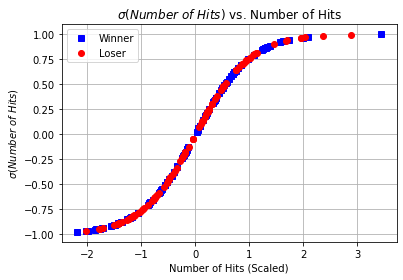

In [188]:
winners_x, winners_y, losers_x, losers_y = [],[],[],[]

def sigmoid(x):
    return 1/(1+math.exp(-x))

col_names = ema_num.columns.to_list()
x_axis = 'Hits'
y_axis = 'RBIs'
h_x = col_names.index(f'Home {x_axis} EMA')
v_x = col_names.index(f'Visiting {x_axis} EMA')
h_y = col_names.index(f'Home {y_axis} EMA')
v_y = col_names.index(f'Visiting {y_axis} EMA')
data = ema_train_scaled
gamma=1
for i in np.arange(100):
    if pred_bin[i] == 'Home':
        winners_x.append(data[i, h_x])
        winners_y.append(math.tanh(gamma*data[i, h_x]))
        losers_x.append(data[i, v_x])
        losers_y.append(math.tanh(gamma*data[i, v_x]))
    else:
        losers_x.append(data[i, h_x])
        losers_y.append(math.tanh(gamma*data[i, h_x]))
        winners_x.append(data[i, v_x])
        winners_y.append(math.tanh(gamma*data[i, v_x]))
        
plt.plot(winners_x, winners_y, 'bs', label='Winner')
plt.plot(losers_x, losers_y, 'ro', label='Loser')
plt.xlabel('Number of Hits (Scaled)')
plt.ylabel('$\sigma(Number \ of \ Hits)$')
plt.title('$\sigma(Number \ of \ Hits)$ vs. Number of Hits')
plt.grid()
plt.legend()

path = '/mnt/c/Users/Michael/Documents/UCONN/courses/Senior Design/figures/'
plt.savefig(path + 'sigmoid.png', format='png', dpi=300)

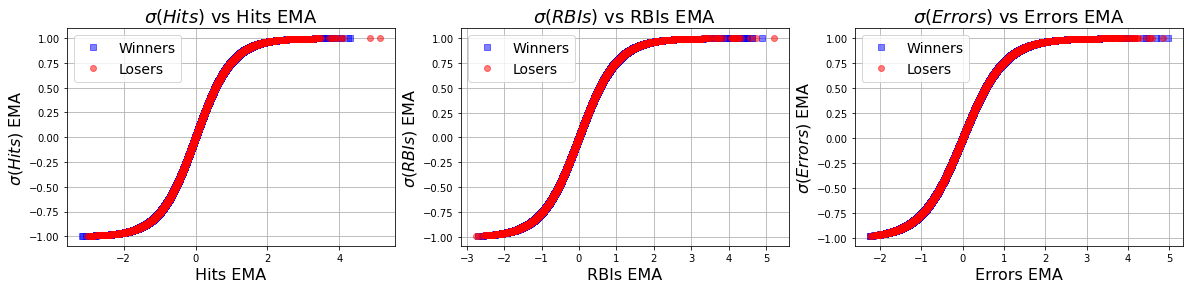

In [340]:
def make_winners_losers_sigmoid(x_label, gamma):
    # Let's plot hits vs rbis of the winners and losers
    winners_x, winners_y, losers_x, losers_y =[],[],[],[]
    # get column indexes
    col_names = ema_num.columns.to_list()
    x_axis = x_label
    h_x = col_names.index(f'Home {x_axis} EMA')
    v_x = col_names.index(f'Visiting {x_axis} EMA')
    for i in range(len(ema_train_scaled)):
        if pred_bin[i] == 'Home':
            winners_x.append(data[i, h_x])
            winners_y.append(math.tanh(gamma*data[i, h_x]))
            losers_x.append(data[i, v_x])
            losers_y.append(math.tanh(gamma*data[i, v_x]))
        else:
            losers_x.append(data[i, h_x])
            losers_y.append(math.tanh(gamma*data[i, h_x]))
            winners_x.append(data[i, v_x])
            winners_y.append(math.tanh(gamma*data[i, v_x]))
            
    return winners_x, winners_y, losers_x, losers_y

def make_plots_sigmoid(ax, x_label, gamma):
    winners_x, winners_y, losers_x, losers_y = make_winners_losers_sigmoid(x_label, gamma)
    ax.plot(winners_x, winners_y, 'bs', label='Winners', alpha=0.5)
    ax.plot(losers_x, losers_y, 'ro', label='Losers', alpha=0.5)
    ax.legend(fontsize=14)
    ax.set_xlabel(f'{x_label} EMA', fontsize=16)
    ax.set_ylabel(f'$\sigma({x_label})$ EMA', fontsize=16)
    ax.set_title(f'$\sigma({x_label})$ vs {x_label} EMA', fontsize=18)
    ax.grid()
    
fig, axs = plt.subplots(1,3)
fig.set_size_inches(20,4)
make_plots_sigmoid(axs[0], 'Hits', 1)
make_plots_sigmoid(axs[1], 'RBIs', 1)
make_plots_sigmoid(axs[2], 'Errors', 1)

path = '/mnt/c/Users/Michael/Documents/UCONN/courses/Senior Design/figures/'
plt.savefig(path + 'sigmoid.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [426]:
param_sigmoid = {'kernel': ['sigmoid'], 'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1], 'gamma': ['auto', 'scale', 1,2,3,4,5],}

data = ema_train_scaled[0:1000]
targets = pred_bin[0:cutoff][0:1000]

grid_sigmoid = GridSearchCV(SVC(), param_sigmoid, cv=5)
grid_sigmoid.fit(data, targets)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                               1],
                         'gamma': ['auto', 'scale', 1, 2, 3, 4, 5],
                         'kernel': ['sigmoid']})

In [427]:
grid_sigmoid.best_params_

{'C': 1, 'gamma': 5, 'kernel': 'sigmoid'}

In [429]:
grid_sigmoid.best_score_

0.541

In [431]:
data = ema_train_scaled
targets = pred_bin[0:cutoff]

cross_val_score(SVC(kernel='sigmoid', C=1, gamma=5), data, targets, cv=5)

array([0.50337553, 0.51772152, 0.51392405, 0.52173913, 0.49641199])

In [432]:
np.average([0.50337553, 0.51772152, 0.51392405, 0.52173913, 0.49641199])

0.510634444

In [163]:
param_rbf = {'C':[1,10], 'kernel':['rbf'], 'gamma':['scale','auto']}

grid_rbf = GridSearchCV(SVC(), param_rbf, cv=10)
grid_rbf.fit(ema_train_scaled, winners_train)

KeyboardInterrupt: 

In [93]:
grid_rbf.cv_results_

{'mean_fit_time': array([8.04670701, 8.03767867]),
 'std_fit_time': array([0.06797058, 0.06100418]),
 'mean_score_time': array([1.33233538, 1.34557123]),
 'std_score_time': array([0.01644459, 0.0077973 ]),
 'param_C': masked_array(data=[1, 1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=['scale', 'auto'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'},
  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}],
 'split0_test_score': array([0.51350211, 0.51308017]),
 'split1_test_score': array([0.52447257, 0.52447257]),
 'split2_test_score': array([0.51983122, 0.52025316]),
 'split3_test_score': array([0.52596032, 0.52638244]),
 'split4_test_score': array([0.49345715, 0.49387927]),
 'mean_test_

In [95]:
grid_rbf.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [18]:
# let's write important test/train data to files so testing other models is even easier (with this data at least)
ema_num.to_csv(path_or_buf='datasets/cleaned_data/ema_num.csv')
cma_num.to_csv(path_or_buf='datasets/cleaned_data/cma_num.csv')
sma_num.to_csv(path_or_buf='datasets/cleaned_data/sma_num.csv')

winners_bin = pd.Series(winners_bin)
winners_bin.to_csv(path_or_buf='datasets/cleaned_data/winners.csv')

NameError: name 'winners_bin' is not defined